# Lista 8 de exercícios - Visualização de dados

Chegamos à ultima lista de exercícios do nosso curso, do tema "Visualização de dados". Aqui, usaremos um *dataset* de dados de uma certa clínica médica, em que cada observação corresponde a um paciente. Importemos os dados:

In [ ]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Baixando os dados
url = 'https://raw.githubusercontent.com/matheuslimaandrade/SIN-MachineLearning_Datasets/main/insurance.csv'
df = pd.read_csv(url)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Breve descrição das colunas:


**age**: idade do beneficiário primário
**age**: idade do beneficiário primário

**sex**: gênero do contratante

**bmi**: índice de massa corporal (IMC)

**children**: número de crianças cobertas pelo plano / número de dependentes

**smoker**: fumante ("yes", se fumante; "no", se não fumante)

**region**: área residencial do paciente nos EUA: Nordeste (northeast), Sudeste (southeast), Sudoeste (southwest), Noroeste (northwest).

**charges**: custos médicos individuais cobrados pelo plano de saúde

Explorando os dados:

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exercícios:

### 1) Faça um gráfico para analisar a associação entre idade e cobrança do plano.

<Axes: xlabel='age', ylabel='charges'>

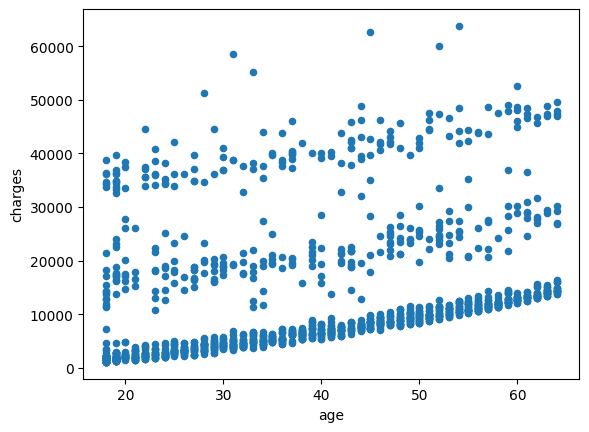

In [ ]:
# Resposta
df.plot.scatter(x='age', y='charges')

### 2)

#### a) Faça um gráfico para analisar a quantidade de fumantes e não-fumantes na amostra

<Axes: xlabel='smoker'>

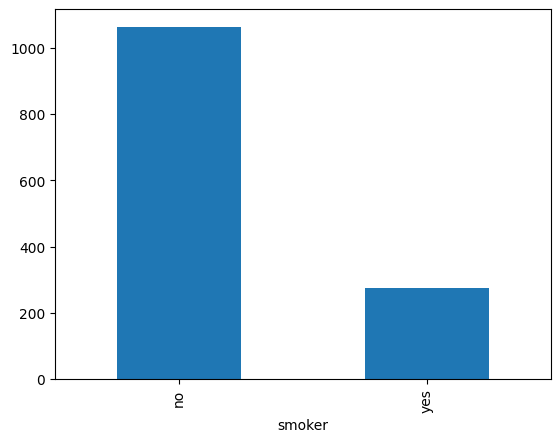

In [ ]:
# Resposta
df.smoker.value_counts().plot(kind='bar')

#### b) Agora, faça um gráfico para analisar a quantidade de homens e mulheres na amostra

<Axes: xlabel='sex'>

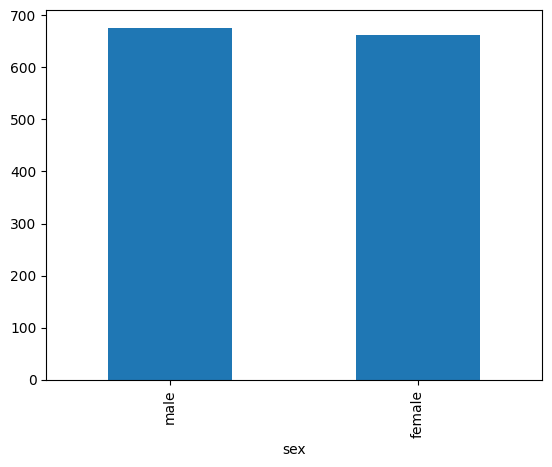

In [ ]:
# Resposta
df.sex.value_counts().plot(kind='bar')

#### c) Por fim, faça um gráfico para analisar a quantidade de indivíduos de cada sexo em cada categoria de "smoker" (fumante)
dica: dê uma olhada na função ```.countplot()``` do *Seaborn*

<Axes: xlabel='sex'>

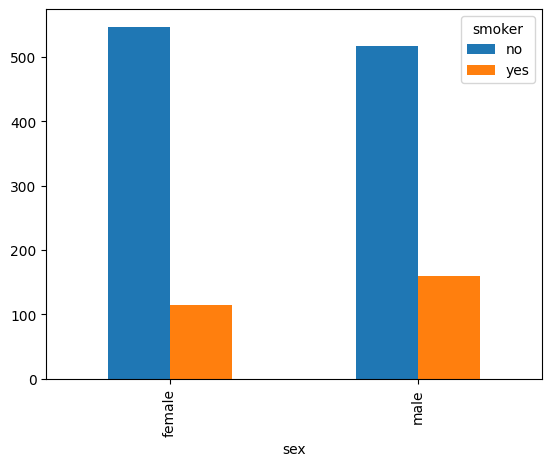

In [ ]:
# Resposta
df.groupby(['sex', 'smoker']).size().unstack().plot(kind='bar')

### 3) Faça um gráfico que nos permita analisar a distribuição da cobrança do plano de saúde para cada região dos EUA

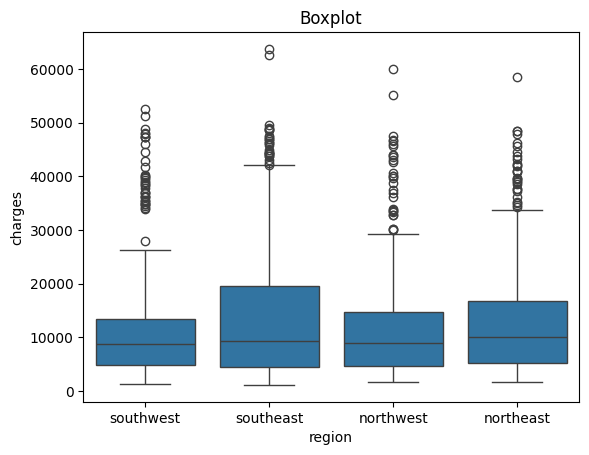

In [ ]:
# Resposta
sns.boxplot(x = df["region"], y = df["charges"])
plt.xlabel("region")
plt.ylabel("charges")
plt.title("Boxplot")
plt.show()

### 4) Crie gráficos que nos permitam ver a distribuição de alguns dados para cada idade na amostra.

#### a) Faça um gráfico que nos permita ver a evolução da proporção de fumantes para cada idade na amostra

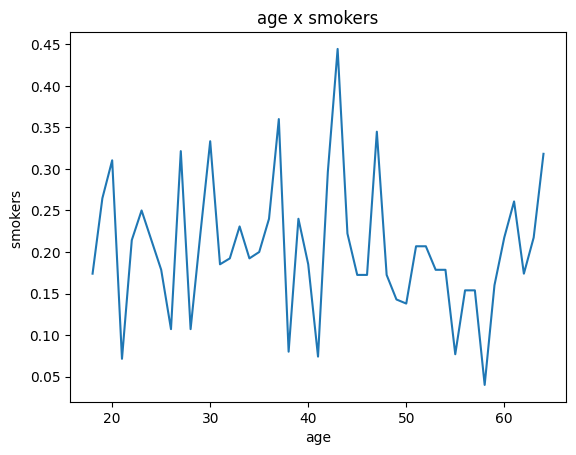

In [ ]:
# Resposta
def smolker_age(age, data = df):
    return (len(df[(df["smoker"] == "yes") & (data["age"] == age)])/len(df[df["age"] == age]))
props = {age: smolker_age(age) for age in sorted(df["age"].unique())}
plt.plot(props.keys(), props.values())
plt.xlabel("age")
plt.ylabel("smokers ")
plt.title("age x smokers")
plt.show()


#### b) Faça um gráfico que nos permita ver a evolução do IMC médio para cada idade na amostra

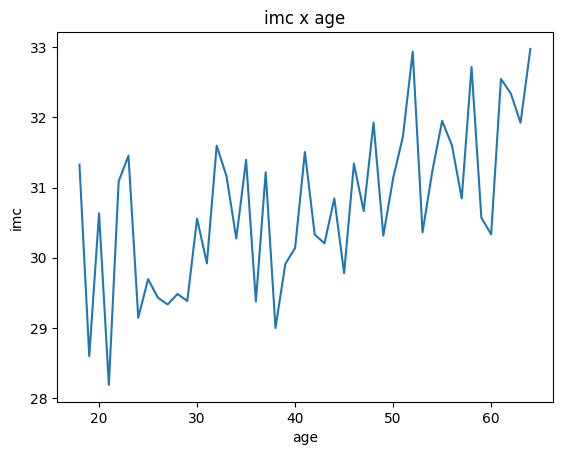

In [ ]:
# Resposta
def imc(age, data = df):

    return np.mean(df[df["age"] == age]["bmi"])
imcs = {age: imc(age) for age in sorted(df["age"].unique())}
plt.plot(imcs.keys(), imcs.values())
plt.xlabel("age")
plt.ylabel("imc")
plt.title("imc x age")
plt.show()


#### c) Faça um gráfico que nos permita analisar a evolução do número médio de crianças no plano para cada idade na amostra

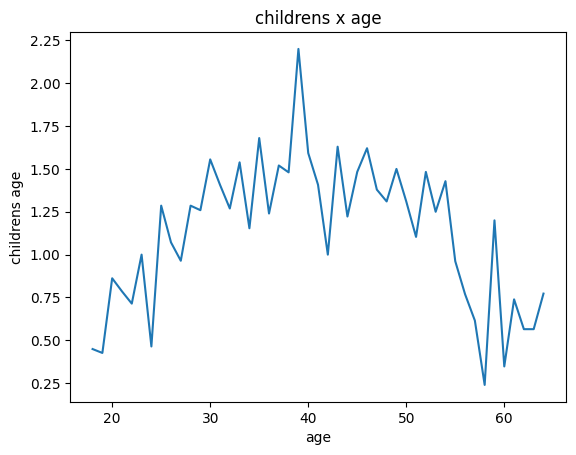

In [ ]:
# Resposta
def childrens_age(age, data = df):
    return np.mean(data[data["age"] == age]["children"])
medias = {age: childrens_age(age) for age in sorted(df["age"].unique())}
plt.plot(medias.keys(), medias.values())
plt.xlabel("age")
plt.ylabel("childrens age")
plt.title("childrens x age")
plt.show()

### 5) Faça um gráfico que nos permita analisar a correlação entre todas as colunas ao mesmo tempo (para incluir "sex" e "smoker" na análise, crie variáveis binárias para cada uma das colunas)
dica: crie um novo dataframe com as duas colunas citadas com variáveis binárias

ValueError: could not convert string to float: 'southwest'

### 6) Faça um gráfico interativo e dinâmico da distribuição de cobrança para fumantes e não-fumantes
dica: o nome da função na biblioteca é ```.box()```

In [ ]:
# Resposta
px.box(x = "smoker", y = "charges", data_frame = df, title = "charges by smokers and no smokers")
